In [312]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objs as go
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [313]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('C://Users/Ulia/Untitled Folder/Forecasting-and-Time-Series-2ed-main/datatest/bike-sharing.csv')

In [314]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


<AxesSubplot:xlabel='dteday'>

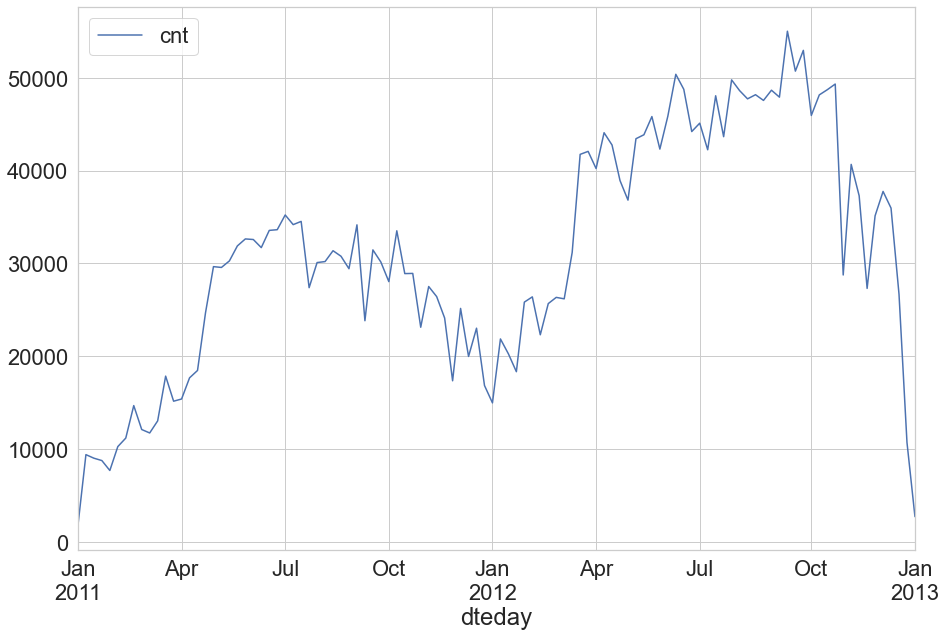

In [315]:
df = df[['dteday', 'cnt']]
df['dteday']=pd.to_datetime(df['dteday'])

df.set_index('dteday',inplace=True)
df3=df.resample('W').sum()
df3.plot()

In [316]:
# Розділяємо на тренувальну (70%) та тестову (30%) вибірку
train, test = df.iloc[0:int(len(df)*0.7)], df.iloc[int(len(df)*0.7):]

In [317]:
# Рівні агрегації по дню, тижню, місяцю та року та фунція агрегації сума

train_day_sum = train.resample('D').sum()
train_week_sum= train.resample('W').sum()
train_month_sum = train.resample('M').sum()
train_year_sum = train.resample('Y').sum()


In [318]:
# Розрахунок передбачнь часового ряду, як середнє значення, в залежності від рівня агрегації
test_day_sum = test.assign(pred1 = train_day_sum['cnt'].mean())
test_week_sum = test.assign(pred1 = train_week_sum['cnt'].mean())
test_month_sum = test.assign(pred1 = train_month_sum['cnt'].mean())
test_year_sum = test.assign(pred1 = train_year_sum['cnt'].mean())

In [319]:
def mae(test, true_col, pred_col):
    mae = np.round(mean_absolute_error(test[true_col], test[pred_col]),2)
    return mae

In [320]:
# Розрахунок середньої абсолютної помилки
mae_mean_day = mae(test_day_sum, 'cnt', 'pred1')
mae_mean_week = mae(test_week_sum, 'cnt', 'pred1')
mae_mean_month = mae(test_month_sum, 'cnt', 'pred1')
mae_mean_year = mae(test_year_sum, 'cnt', 'pred1')

In [321]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(f"MAE for day={mae_mean_day}", f"MAE for week={mae_mean_week}", 
                                                    f"MAE for month={mae_mean_month}", f"MAE for year={mae_mean_year}"))
fig.add_trace(go.Scatter(x=test_day_sum.index, y= test_day_sum['cnt'], name = 'day agreggation'), 1,1)
fig.add_trace(go.Scatter(x= test_day_sum.index, y=test_day_sum['pred1'], name = 'preds for day agreggation'), 1,1)

fig.add_trace(go.Scatter(x=test_week_sum.index, y= test_week_sum['cnt'], name = 'week agreggation'), 1,2)
fig.add_trace(go.Scatter(x= test_week_sum.index, y=test_week_sum['pred1'], name = 'preds for week agreggation'), 1,2)

fig.add_trace(go.Scatter(x=test_month_sum.index, y= test_month_sum['cnt'], name = 'month agreggation'), 2,1)
fig.add_trace(go.Scatter(x= test_month_sum.index, y=test_month_sum['pred1'], name = 'preds for month agreggation'), 2,1)

fig.add_trace(go.Scatter(x=test_year_sum.index, y= test_year_sum['cnt'], name = 'year agreggation'), 2,2)
fig.add_trace(go.Scatter(x= test_year_sum.index, y=test_year_sum['pred1'], name = 'preds for year agreggation'), 2,2)

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.show()

In [322]:
# Передбачення для наступного моменту буде рівним поточному 
df['pred4'] = df['cnt'].shift()
df.head()

,cnt,pred4
dteday,,
2011-01-01,16,NaN
2011-01-01,40,16.0
2011-01-01,32,40.0
2011-01-01,13,32.0
2011-01-01,1,13.0


In [323]:
# Агрегація по тижню і дню та функцією суми
df1 = df.resample('W').sum()
df2 = df.resample('D').sum()

In [324]:
# Розбиття даних на тренувальні і тестові
train1, test1 = df1.iloc[0:int(len(df1)*0.7)], df1.iloc[int(len(df1)*0.7):]
train2, test2 = df2.iloc[0:int(len(df2)*0.7)], df2.iloc[int(len(df2)*0.7):]
len(train1), len(test1), len(train2), len(test2)

(74, 32, 511, 220)

In [325]:
mae_mean_shift_week = mae(test1, 'cnt', 'pred4')
mae_mean_shift_day = mae(test2, 'cnt', 'pred4')

fig = make_subplots(rows = 2, cols=1, 
                    subplot_titles=(f"MAE for week={mae_mean_shift_week}", f"MAE for day={mae_mean_shift_day}"))

fig.add_trace(go.Scatter(x=test1.index, y= test1['cnt'],  name = 'week agreggation'), 1,1)
fig.add_trace(go.Scatter(x= test1.index, y=test1['pred4'], name = 'preds for shift week agreggation'), 1,1)

fig.add_trace(go.Scatter(x=test2.index, y= test2['cnt'],  name = 'day agreggation'), 2,1)
fig.add_trace(go.Scatter(x= test2.index, y=test2['pred4'], name = 'preds for shift day agreggation'), 2,1)

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.show()

In [326]:
# Розрахунок різних помилок
print('MSE = ', mean_squared_error(df1['cnt'],df1['pred4']))
print('MAE = ', mean_absolute_error(df1['cnt'],df1['pred4']))
print('R2 = ', r2_score(df1['cnt'],df1['pred4']))

MSE =  1129.7075471698113
MAE =  24.839622641509433
R2 =  0.9999930391160754


In [327]:
# Розрахунок остатків
df1['residuals']= df1['cnt']-df1['pred4']

In [328]:
df1.head()

,cnt,pred4,residuals
dteday,,,
2011-01-02,1786,1778.0,8.0
2011-01-09,9408,9410.0,-2.0
2011-01-16,9025,9013.0,12.0
2011-01-23,8770,8767.0,3.0
2011-01-30,7699,7699.0,0.0


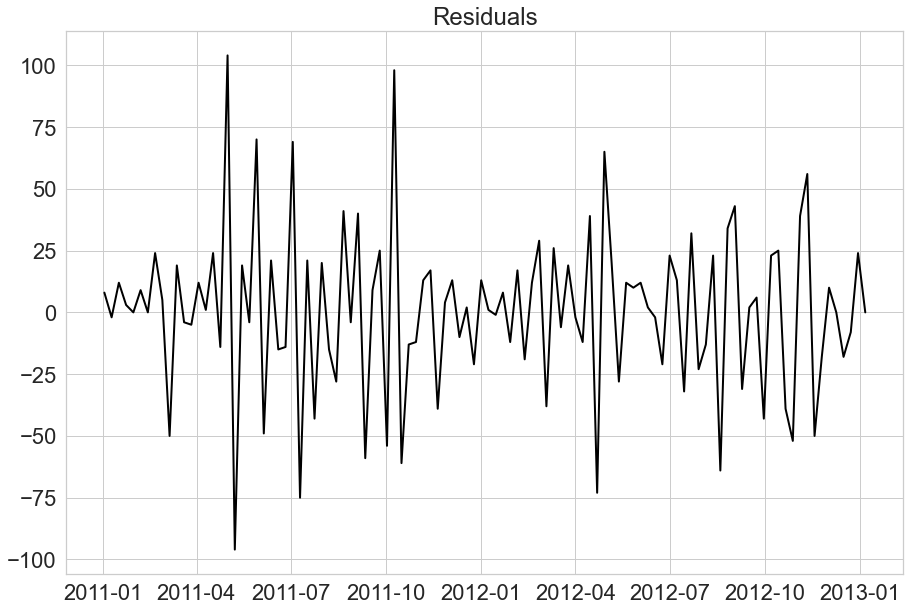

In [329]:
fig,ax = plt.subplots()
ax.plot(df1['residuals'], linewidth=2,color='black')
ax.set_title('Residuals')
plt.show()

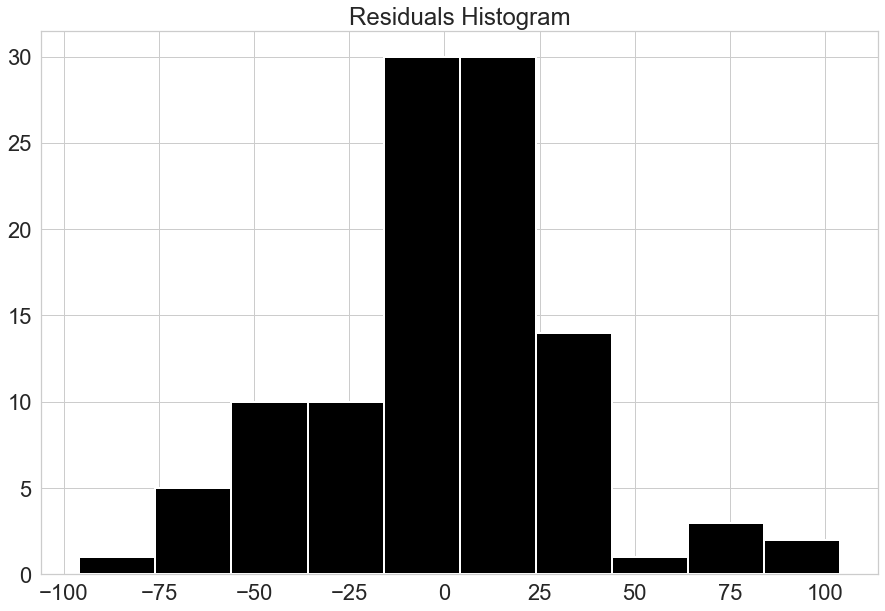

In [330]:
fig,ax = plt.subplots()
ax.hist(df1['residuals'], linewidth=2,color='black')
ax.set_title('Residuals Histogram')
plt.show()